In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dzień = ['poniedziałek', 'wtorek', 'środa', 'czwartek', 'piątek']
okienko = ['08:30-10:00', '10:15-11:45', '12:00-13:30', 
           '13:45-15:15', '15:30-17:00', '17:15-18:45', 
           '19:00-20:30']

głosy = """
juustte 'E4 E6 E7 F6 F7'
terzioo 'B5 D6 F6 F7'
gacek91 'D2 E4 E6'
FNCY 'B5 B6 D6'
violettaz 'B5 C6 F6'
tomsitoms 'B5 C6 F6'
mmista 'B5 C6 E6'
inezgiemza 'B5 B6 E4'
oborkowska 'B7 B8 C2 C4 C5 C6 D6 D7 D8 E4 E6 E7 E8 F6'
moniakow 'B5 B6 B7 B8 C4 D6 D7 D8 E4'
Linace123 'C5 C6 C7 D5 D6 D7 E4 E6 E7'
majmis 'B5 C4 C5 D6 E4'
mraciborski 'B5 C4 D6'
kasiado 'B5, B6, C5, D6, E4'
Mariszka 'C2, C3, C7, C8, D6, D7, D8, F6, F7, F8'
ksndr 'B7 C3 C5 D7 E4 E6 F6 F7'
jzamojska 'B5 B6 B7 C7 D6 D7 F6'
kuchart 'B5 B6 C7 D5 E2 E4'
wiktoriakowalczyk 'B5 B6 E4'
AnastazjaR 'C5 C6 B6'
hubertwoz 'B5 C4 C5 D6 D7 D8 E4 E6 E7 E8 F6 F7 F8'
"""
głosy = głosy.split('\n')[1:-1]

In [3]:
def parse_votes(line):
    kto, naco, _ = line.split("'")
    kto = kto[:-1]
    naco = naco.split(' ')
    return kto, naco

votes = dict()
for line in głosy:
    kto, naco = parse_votes(line)
    votes[kto] = naco

In [4]:
def termin2idx(termin):
    days = list('BCDEF')
    day = days.index(termin[0])
    window = int(termin[1]) - 2
    return [window, day]

termin2idx('C3')

[1, 1]

In [5]:
kalendarz = np.zeros([7, 5])
for os in votes.keys():
    vts = votes[os]
    for v in vts:
        idx = termin2idx(v)
        kalendarz[idx[0], idx[1]] += 1

In [6]:
kalendarz

array([[  0.,   2.,   1.,   1.,   0.],
       [  0.,   2.,   0.,   0.,   0.],
       [  0.,   5.,   0.,  12.,   0.],
       [ 14.,   7.,   2.,   0.,   0.],
       [  8.,   6.,  11.,   7.,   9.],
       [  4.,   4.,   7.,   4.,   5.],
       [  2.,   1.,   4.,   2.,   2.]])

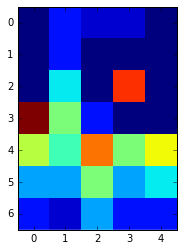

In [7]:
%matplotlib inline
plt.imshow(kalendarz, interpolation='none')

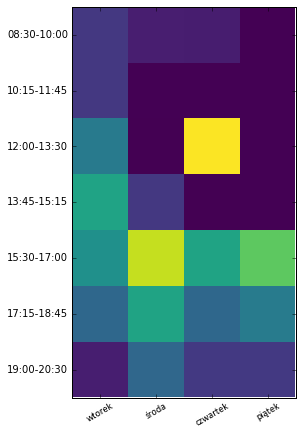

In [8]:
# niestety poniedziałek odpada - to już dziś
kalendarz = kalendarz[:, 1:]

# wyświetlamy trochę ładniej
fig, ax = plt.subplots(figsize=(5,7))
im = ax.imshow(kalendarz, interpolation='none', cmap='viridis')
im.axes.set_xticks([0, 1, 2, 3])
im.axes.set_xticklabels(dzień[1:], fontname='Calibri', rotation=30)
im.axes.set_yticks(range(7))
im.axes.set_yticklabels(okienko);

In [9]:
letters = list('CDEF')
windows = list('2345678')

# sprawdzamy każde dwa możliwe zestawienia terminów
# patrzymy ile unikatowych osób może w sumie przyjść
# przy takiej kombinacji
all_terminy = [l + w for l in letters for w in windows]
all_possible_pairs = [[i, j] for i in all_terminy for j in all_terminy if not i == j]

# wyświetlalmy kilka
all_possible_pairs[:5]

[['C2', 'C3'], ['C2', 'C4'], ['C2', 'C5'], ['C2', 'C6'], ['C2', 'C7']]

In [10]:
def who_can(termin, votes):
    can = list()
    for prs, vts in votes.items():
        if termin in vts:
            can.append(prs)
    return can
len(who_can('B5', votes))

13

In [12]:
def who_can_any_of(terminy, votes):
    can = list()
    for trm in terminy:
        os = who_can(trm, votes)
        can += os
    return set(can)

list(who_can_any_of(['B5', 'E4'], votes))[:6]

['violettaz',
 'FNCY',
 'inezgiemza',
 'wiktoriakowalczyk',
 'kasiado',
 'hubertwoz']

In [13]:
ilemoże = lambda trm: len(who_can_any_of(trm, votes))
ilemoże(['B5', 'E4'])

19

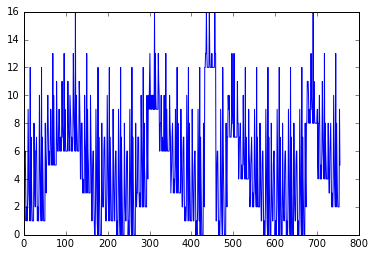

In [14]:
ile = list(map(ilemoże, all_possible_pairs))
plt.plot(ile)

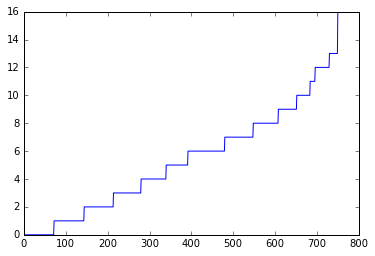

In [15]:
ile_c = ile.copy()
ile_c.sort()
plt.plot(ile_c)

In [16]:
ile = np.array(ile)
max_osb = ile.max()
ktore_terminy = np.where(ile == max_osb)[0]
print(max_osb, ktore_terminy)

16 [123 312 436 443 456 691]


In [17]:
print('Zagłosowało {} osób'.format(len(votes.keys())))
print('Dwa terminy, które maksymalizują liczbę obecnych osób:')
for t in ktore_terminy:
    trm = all_possible_pairs[t]
    tekst = ''
    idx1 = termin2idx(trm[0])
    tekst += dzień[idx1[1]] + ' ' + okienko[idx1[0]]
    tekst += ' oraz '
    idx1 = termin2idx(trm[1])
    tekst += dzień[idx1[1]] + ' ' + okienko[idx1[0]]
    print(tekst)

Zagłosowało 21 osób
Dwa terminy, które maksymalizują liczbę obecnych osób:
wtorek 15:30-17:00 oraz czwartek 12:00-13:30
środa 15:30-17:00 oraz czwartek 12:00-13:30
czwartek 12:00-13:30 oraz wtorek 15:30-17:00
czwartek 12:00-13:30 oraz środa 15:30-17:00
czwartek 12:00-13:30 oraz piątek 15:30-17:00
piątek 15:30-17:00 oraz czwartek 12:00-13:30
